<a href="https://colab.research.google.com/github/HotuRam/iPhone_classifier/blob/main/iphone_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# iPhone Classifier

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book() 
#if this cell is not working restart run time then execute the cell it will work try it

Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
iPhone_types = ('iPhone_13_Pro_Max','iPhone_1st','iPhone_3G_White', 'iPhone_4', 'iPhone_4S',
'iPhone_5', 'iPhone_5C_Green', 'iPhone_5C_Pink', 'iPhone_5S_Gold', 'iPhone_5S_Space_Gray', 'iPhone_6_Plus_Space_Gray', 
'iPhone_6s_Rose_Gold', 'iPhone_7_Plus_Black', 'iPhone_5_Black', 'iPhone_SE')

In [ ]:
path = Path('/content/gdrive/MyDrive/iPhone_classifier_useful_data') #make sure you gave currect path from gdrive

In [ ]:
iPhone_types = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = iPhone_types.dataloaders(path)

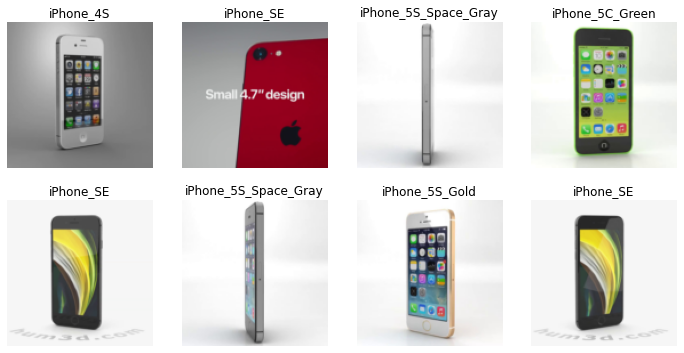

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

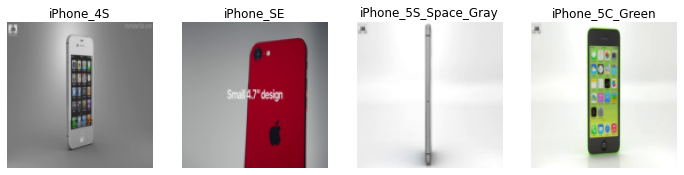

In [ ]:
iPhone_types = iPhone_types.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = iPhone_types.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

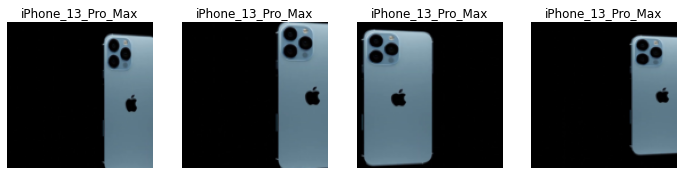

In [ ]:
iPhone_types = iPhone_types.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = iPhone_types.dataloaders(path,bs=64)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

# cropmethod avoid the overfitting 

The batch size is by default bs = 64. If you change that value for a lower one, it will work.

dls = Object_types.dataloaders(path,bs=5)


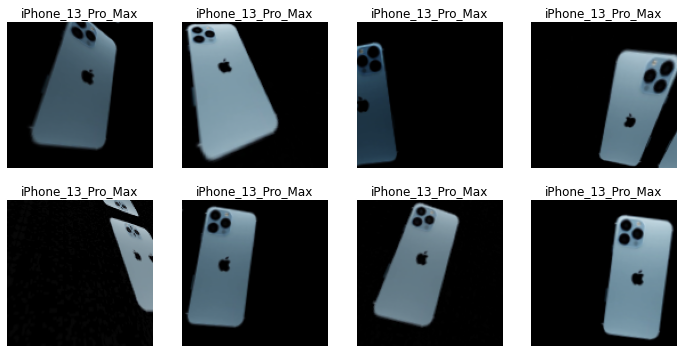

In [ ]:
iPhone_types = iPhone_types.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = iPhone_types.dataloaders(path,bs=64)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
iPhone_types = iPhone_types.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = iPhone_types.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.353858,0.492904,0.155738,05:11


epoch,train_loss,valid_loss,error_rate,time
0,0.431210,0.124940,0.038251,00:41
1,0.263215,0.064051,0.027322,00:40
2,0.180126,0.051332,0.021858,00:41
3,0.132861,0.040152,0.019126,00:40


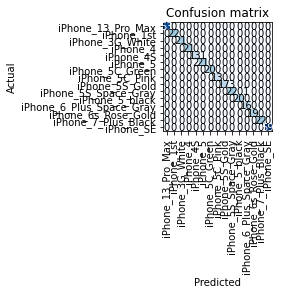

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.confusion_matrix()

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 13,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 17,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0

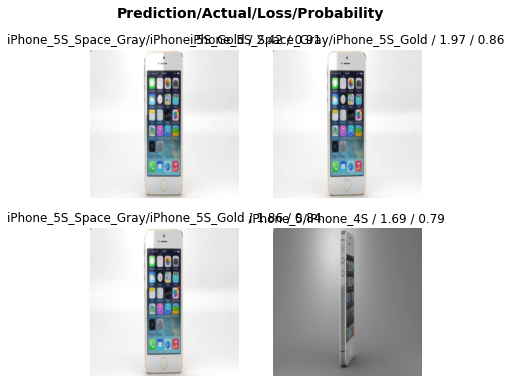

In [ ]:
interp.plot_top_losses(4, nrows=2)

In [ ]:
from fastai.vision.widgets import *

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')


(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/iPhone_classifier_useful_data/iPhone_4/iPhone_4_1.jpg')

('iPhone_4',
 TensorBase(3),
 TensorBase([8.6926e-07, 8.3364e-05, 1.6833e-07, 9.9969e-01, 1.6704e-06, 5.1308e-05, 4.8480e-06, 6.8193e-07, 1.7681e-06, 1.6282e-06, 1.3655e-04, 6.1191e-07, 3.0607e-07, 7.9016e-07, 2.2512e-05]))

In [ ]:
learn_inf.dls.vocab

['iPhone_13_Pro_Max', 'iPhone_1st', 'iPhone_3G_White', 'iPhone_4', 'iPhone_4S', 'iPhone_5', 'iPhone_5C_Green', 'iPhone_5C_Pink', 'iPhone_5S_Gold', 'iPhone_5S_Space_Gray', 'iPhone_5_black', 'iPhone_6_Plus_Space_Gray', 'iPhone_6s_Rose_Gold', 'iPhone_7_Plus_Black', 'iPhone_SE']

## Creating a Notebook App from the Model


In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/iPhone_classifier_useful_data/iPhone_4/iPhone_4_1.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
# hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: iPhone_4; Probability: 0.9997')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
 img = PILImage.create(btn_upload.data[-1])
 out_pl.clear_output()
 with out_pl: display(img.to_thumb(128,128))
 pred,pred_idx,probs = learn_inf.predict(img)
 lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
VBox([widgets.Label('Select your iPhone!'),
      btn_upload, btn_run, out_pl, lbl_pred])

## **Results**
#### 12 minutes to execute the complete notebook and look at the confusion matrix 

# Again with resnet34

In [ ]:
learn1 = cnn_learner(dls, resnet34, metrics=error_rate)
learn1.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.515310,0.325902,0.103825,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.434035,0.072025,0.019126,00:44
1,0.269880,0.138940,0.024590,00:43
2,0.180070,0.043211,0.016393,00:43
3,0.118204,0.035887,0.013661,00:43
4,0.082860,0.031320,0.013661,00:43


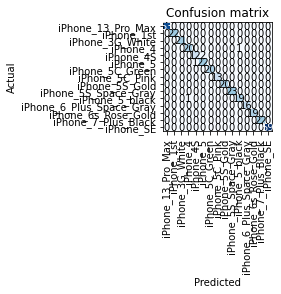

In [ ]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [ ]:
interp.confusion_matrix()

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [ ]:
VBox([widgets.Label('Select your iPhone!'),
      btn_upload, btn_run, out_pl, lbl_pred])